#IMPORTING LIBRARIES

PROJECT PRESENTATION LINK:
https://drive.google.com/file/d/1tz_eMAExCK6RwJLLvDAoDbp4fdwoOlZ1/view?usp=sharing

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
import spacy
import pandas as pd
import numpy as np
import re,string
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import gensim.downloader as api
import nltk
nltk.download('stopwords')

print("\n")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import torch
import torchvision
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re,string
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#LOADING THE DATASET

In [ ]:
# df=pd.read_excel('/content/nlp.xlsx')
df = pd.read_excel("/content/drive/MyDrive/nlp.xlsx")

In [ ]:
df

,name_of_drug,review_by_patient,number_of_times_prescribed,base_score
0,Valsartan,"""It has no side effect, I take it in combinati...",27,8.022969
1,Guanfacine,"""My son is halfway through his fourth week of ...",192,7.858458
2,Lybrel,"""I used to take another oral contraceptive, wh...",17,6.341969
3,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",37,6.590176
4,Cialis,"""2nd day on 5mg started to work with rock hard...",43,6.144782
...,...,...,...,...
32160,Cymbalta,"""I have been taking Cymbalta for 15 months now...",89,6.963020
32161,Nexplanon,"""I have had the Nexplanon since Dec. 27, 2016 ...",0,0.899076
32162,Venlafaxine,"""Had panic attacks and social anxiety starting...",25,6.241812
32163,Fluoxetine,"""I have been off Prozac for about 4 weeks now....",22,7.940428


##UNDERSTANDING THE DATA

In [ ]:
df.head()

,name_of_drug,review_by_patient,number_of_times_prescribed,base_score
0,Valsartan,"""It has no side effect, I take it in combinati...",27,8.022969
1,Guanfacine,"""My son is halfway through his fourth week of ...",192,7.858458
2,Lybrel,"""I used to take another oral contraceptive, wh...",17,6.341969
3,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",37,6.590176
4,Cialis,"""2nd day on 5mg started to work with rock hard...",43,6.144782


In [ ]:
df.tail()

,name_of_drug,review_by_patient,number_of_times_prescribed,base_score
32160,Cymbalta,"""I have been taking Cymbalta for 15 months now...",89,6.963020
32161,Nexplanon,"""I have had the Nexplanon since Dec. 27, 2016 ...",0,0.899076
32162,Venlafaxine,"""Had panic attacks and social anxiety starting...",25,6.241812
32163,Fluoxetine,"""I have been off Prozac for about 4 weeks now....",22,7.940428
32164,Orencia,"""Limited improvement after 4 months, developed...",35,8.205393


In [ ]:
df.describe()

,number_of_times_prescribed,base_score
count,32165.000000,32165.000000
mean,27.893207,6.664261
std,35.819035,1.588699
min,0.000000,0.899076
25%,6.000000,6.109307
50%,16.000000,6.788245
75%,36.000000,7.900790
max,771.000000,8.992453


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name_of_drug                32165 non-null  object 
 1   review_by_patient           32165 non-null  object 
 2   number_of_times_prescribed  32165 non-null  int64  
 3   base_score                  32165 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1005.3+ KB


In [ ]:
df.isna().sum()

name_of_drug                  0
review_by_patient             0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())

['Valsartan' 'Guanfacine' 'Lybrel' ... 'Benzamycin' 'Midamor' 'Didrex']
['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. _x000D_\nWe have tried many different medications and so far this is the most effective."'
 '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- ve

In [ ]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].value_counts())

Levonorgestrel                       724
Etonogestrel                         628
Ethinyl estradiol / norethindrone    547
Ethinyl estradiol / norgestimate     425
Nexplanon                            397
                                    ... 
Ephedrine / guaifenesin                1
Xalkori                                1
Methscopolamine                        1
Brimonidine / timolol                  1
Didrex                                 1
Name: name_of_drug, Length: 2220, dtype: int64
"Good"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
df.columns

Index(['name_of_drug', 'review_by_patient', 'number_of_times_prescribed',
       'base_score'],
      dtype='object')

In [ ]:
df['base_score'].value_counts()

7.170997    292
8.745991    281
6.493653    281
6.173134    260
8.074493    258
           ... 
8.530035      1
6.505984      1
7.770829      1
8.592949      1
5.874253      1
Name: base_score, Length: 1383, dtype: int64

#DATA PREPROCESSING

In [ ]:
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)

In [ ]:
df['review_by_patient']=pd.DataFrame(df.review_by_patient.apply(cleaned1))

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
from bs4 import BeautifulSoup

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:
import re,string,unicodedata

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [ ]:
df['review_by_patient']=df['review_by_patient'].apply(denoise_text)

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [ ]:
df['review_by_patient']=df['review_by_patient'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [ ]:
df['review_by_patient']=df['review_by_patient'].apply(remove_special_characters)

In [ ]:
from nltk.corpus import stopwords


#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

{'their', 'ours', 'themselves', 'ain', 'some', 'your', 'shan', 'or', 'again', "that'll", 'no', 'only', 'did', 'about', 'wouldn', 'yours', 'most', "shan't", 'which', 'after', "hadn't", 'when', 'off', 'and', 'will', 'by', "needn't", "wouldn't", 'o', "you've", "doesn't", "aren't", 'because', 'm', 'both', 'but', 'that', "mightn't", 'own', 'd', 'you', "should've", 'aren', 'didn', 'against', 'there', 'shouldn', 'having', 'not', 'couldn', 'her', 'each', 'been', 'weren', 'on', 'she', 'this', 'over', 'so', 'few', 'he', 'does', 'here', 'll', 'same', "shouldn't", 'all', "she's", 'below', 'is', 'further', 'should', 've', 'those', 'y', "won't", 'nor', 'myself', "hasn't", 'in', 'have', 'yourselves', 're', 'during', 'won', 'who', 'our', 'haven', 'i', 'a', 'yourself', 'do', 'for', 'more', 'herself', 'has', 'being', "haven't", 'than', 'wasn', 'mightn', 'what', 'himself', 'above', 'between', 'once', 'while', 'before', 'now', 'too', 'up', 'these', 'why', 'needn', 'until', 'such', 'ma', 'of', "it's", 's',

In [ ]:
df

,name_of_drug,review_by_patient,number_of_times_prescribed,base_score
0,Valsartan,it has no side effect i take it in combination...,27,8.022969
1,Guanfacine,my son is halfway through his fourth week of i...,192,7.858458
2,Lybrel,i used to take another oral contraceptive whic...,17,6.341969
3,Buprenorphine / naloxone,suboxone has completely turned my life around ...,37,6.590176
4,Cialis,day on started to work with rock hard erecti...,43,6.144782
...,...,...,...,...
32160,Cymbalta,i have been taking cymbalta for months now fi...,89,6.963020
32161,Nexplanon,i have had the nexplanon since dec \ni got m...,0,0.899076
32162,Venlafaxine,had panic attacks and social anxiety starting ...,25,6.241812
32163,Fluoxetine,i have been off prozac for about weeks nowaft...,22,7.940428


In [ ]:
df['review_by_patient']=df['review_by_patient'].apply(remove_stopwords)

In [ ]:
from nltk.stem import WordNetLemmatizer,SnowballStemmer

def simple_stemmer(text):
    ps = SnowballStemmer(language='english')
    return ' '.join([ps.stem(word) for word in tokenizer.tokenize(text)])

In [ ]:
df['review_by_patient'][0]

'side effect take combination bystolic mg fish oil'

In [ ]:
df

,name_of_drug,review_by_patient,number_of_times_prescribed,base_score
0,Valsartan,side effect take combination bystolic mg fish oil,27,8.022969
1,Guanfacine,son halfway fourth week intuniv became concern...,192,7.858458
2,Lybrel,used take another oral contraceptive pill cycl...,17,6.341969
3,Buprenorphine / naloxone,suboxone completely turned life around feel he...,37,6.590176
4,Cialis,day started work rock hard erections however e...,43,6.144782
...,...,...,...,...
32160,Cymbalta,taking cymbalta months first six months later ...,89,6.963020
32161,Nexplanon,nexplanon since dec got first period end janua...,0,0.899076
32162,Venlafaxine,panic attacks social anxiety starting adolesce...,25,6.241812
32163,Fluoxetine,prozac weeks nowafter starting years ago terri...,22,7.940428


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#TFIDF VECTOR

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:

print("\n\nWith TFIDFVectorizer")
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df.review_by_patient)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))


print("\n\nWith TFIDFVectorizer and removing stop words")
vectorizer = TfidfVectorizer(stop_words=nlp.Defaults.stop_words,max_features=100)
X = vectorizer.fit_transform(df.review_by_patient)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))



With TFIDFVectorizer
['acne' 'ago' 'almost' 'also' 'amp' 'anxiety' 'away' 'back' 'bad' 'better'
 'birth' 'bleeding' 'control' 'could' 'cramps' 'day' 'days' 'depression'
 'doctor' 'dose' 'drug' 'effects' 'even' 'ever' 'every' 'experience' 'far'
 'feel' 'feeling' 'felt' 'first' 'get' 'getting' 'go' 'going' 'good' 'got'
 'great' 'help' 'helped' 'hours' 'know' 'last' 'life' 'like' 'little'
 'lot' 'made' 'medication' 'medicine' 'mg' 'month' 'months' 'mood' 'much'
 'nausea' 'never' 'night' 'nothing' 'one' 'pain' 'period' 'periods' 'pill'
 'prescribed' 'put' 'really' 'severe' 'sex' 'side' 'since' 'skin' 'sleep'
 'started' 'still' 'stopped' 'symptoms' 'take' 'taking' 'think' 'time'
 'times' 'took' 'tried' 'try' 'two' 'use' 'used' 'using' 'week' 'weeks'
 'weight' 'well' 'went' 'work' 'worked' 'works' 'would' 'year' 'years']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


['able' 'acne' 'ago' 'amp' 'anxiety' 'away' 'bad' 'better' 'birth'
 'bleeding' 'blood' 'body' 'control' 'cramps' 'day' 'days' 'depression'
 'different' 'doctor' 'dose' 'drug' 'effect' 'effects' 'experience'
 'experienced' 'far' 'feel' 'feeling' 'felt' 'finally' 'gain' 'gave'
 'getting' 'going' 'good' 'got' 'great' 'headaches' 'help' 'helped'
 'horrible' 'hours' 'know' 'later' 'life' 'like' 'little' 'long' 'lost'
 'lot' 'medication' 'medicine' 'mg' 'month' 'months' 'mood' 'morning'
 'nausea' 'night' 'normal' 'noticed' 'old' 'pain' 'period' 'periods'
 'pill' 'pills' 'prescribed' 'recommend' 'right' 'severe' 'sex' 'skin'
 'sleep' 'started' 'stomach' 'stop' 'stopped' 'symptoms' 'taken' 'taking'
 'thing' 'think' 'time' 'times' 'took' 'tried' 'try' 'use' 'want' 'week'
 'weeks' 'weight' 'went' 'work' 'worked' 'works' 'worse' 'year' 'years']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.    

In [ ]:
#X=df.drop(["base_score"], axis=1)
y= df['base_score']
#X.head

In [ ]:
y

0        8.022969
1        7.858458
2        6.341969
3        6.590176
4        6.144782
           ...   
32160    6.963020
32161    0.899076
32162    6.241812
32163    7.940428
32164    8.205393
Name: base_score, Length: 32165, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [ ]:
import sklearn
sklearn.linear_model.LinearRegression()
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.455053447134908

In [ ]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

4.398614310751763

In [ ]:
from sklearn.ensemble import BaggingRegressor
lr = BaggingRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.6079104689548154

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
lr = AdaBoostRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3.0245516185462007

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
lr = GradientBoostingRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.464010238326422

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
lr = XGBRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.524052123567576

#WORD2VEC VECTOR

In [ ]:
from gensim.models import Word2Vec

In [ ]:
sentences = [review.split() for review in df['review_by_patient']]
model = Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
model.save('word2vec.model')

In [ ]:
# Convert each word to vector and represent the sentence in vector form using the word embeddings
def sentence_vector(sentence,model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.vocab]
    if len(word_vectors) == 0:
        return np.zeros((100,))
    return np.mean(word_vectors, axis=0)

In [ ]:
# Convert each sentence in the dataset to a vector using the Word2Vec model
word2vec_data = np.array([sentence_vector(sentence, model) for sentence in df['review_by_patient']])
X_train, X_test, y_train, y_test = train_test_split(word2vec_data, y, test_size=0.3, random_state = 42)

In [ ]:
import sklearn
sklearn.linear_model.LinearRegression()
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.4192914286135747

In [ ]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

4.60930215915857

In [ ]:
from sklearn.ensemble import BaggingRegressor
lr = BaggingRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.5308398575532234

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
lr = AdaBoostRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.611973379983989

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
lr = GradientBoostingRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.402923689433506

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
lr = XGBRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.5305460642942634

#COMBINING TFIDF VECTOR AND WORD2VEC VECTOR

In [ ]:
def combine_vectors(doc,vectorizer):
    tfidf_vec = vectorizer.transform([doc])
    
    w2v_vec = sentence_vector(doc, model)
    combined_vec = np.concatenate([np.squeeze(tfidf_vec.toarray()), w2v_vec])
    return combined_vec

In [ ]:
vectorizer = TfidfVectorizer(max_features=100)
vectorizer.fit(df.review_by_patient)
combined_data = np.array([combine_vectors(doc,vectorizer) for doc in df['review_by_patient']])
X_train, X_test, y_train, y_test = train_test_split(combined_data, y, test_size=0.3, random_state = 42)


In [ ]:
import sklearn
sklearn.linear_model.LinearRegression()
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.4002142178796

In [ ]:
from sklearn.tree import DecisionTreeRegressor
lr = DecisionTreeRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

4.550800049638972

In [ ]:
from sklearn.ensemble import BaggingRegressor
lr = BaggingRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.522481745541661

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
lr = AdaBoostRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.648494961045345

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
lr = GradientBoostingRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.402382107552791

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
lr = XGBRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.4861135081353885

In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt

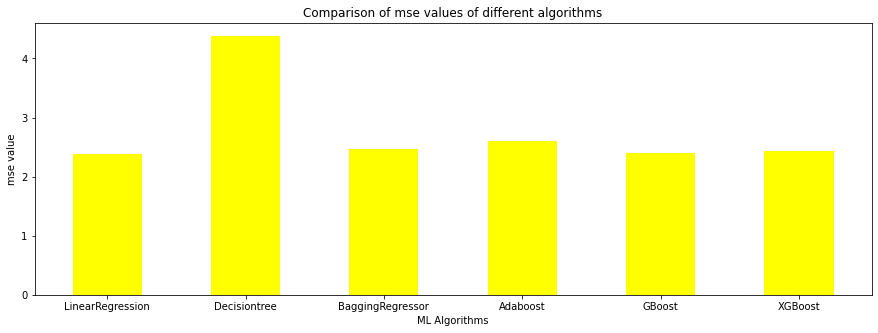

In [ ]:
data = {'LinearRegression':2.39, 'Decisiontree':4.38,  'BaggingRegressor':2.47,  'Adaboost':2.61, 'GBoost':2.40, 'XGBoost':2.44}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (15, 5))
plt.bar(courses, values, color = 'yellow',width=0.5)
plt.xlabel("ML Algorithms")
plt.ylabel("mse value")
plt.title("Comparison of mse values of different algorithms")
plt.show()